

## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [3]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Read in dataset
cars = pd.read_csv("car_insurance.csv")
print(cars.head(10))
# Check for missing values
cars.info()



       id  age  gender  ... duis past_accidents outcome
0  569520    3       0  ...    0              0     0.0
1  750365    0       1  ...    0              0     1.0
2  199901    0       0  ...    0              0     0.0
3  478866    0       1  ...    0              0     0.0
4  731664    1       1  ...    0              1     1.0
5  877557    2       0  ...    0              3     0.0
6  930134    3       1  ...    0              3     0.0
7  461006    1       0  ...    0              0     1.0
8   68366    2       0  ...    0              0     0.0
9  445911    2       0  ...    0              0     1.0

[10 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3

## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# General dataset overview
print("Dataset shape:", cars.shape)
print("Summary statistics:")
print(cars.describe())

Dataset shape: (10000, 18)
Summary statistics:
                  id           age  ...  past_accidents       outcome
count   10000.000000  10000.000000  ...    10000.000000  10000.000000
mean   500521.906800      1.489500  ...        1.056300      0.313300
std    290030.768758      1.025278  ...        1.652454      0.463858
min       101.000000      0.000000  ...        0.000000      0.000000
25%    249638.500000      1.000000  ...        0.000000      0.000000
50%    501777.000000      1.000000  ...        0.000000      0.000000
75%    753974.500000      2.000000  ...        2.000000      1.000000
max    999976.000000      3.000000  ...       15.000000      1.000000

[8 rows x 13 columns]


In [5]:
# Fill missing values with the mean
cars["credit_score"].fillna(cars["credit_score"].mean(), inplace=True)
cars["annual_mileage"].fillna(cars["annual_mileage"].mean(), inplace=True)


Target variable distribution:
0.0    0.6867
1.0    0.3133
Name: outcome, dtype: float64


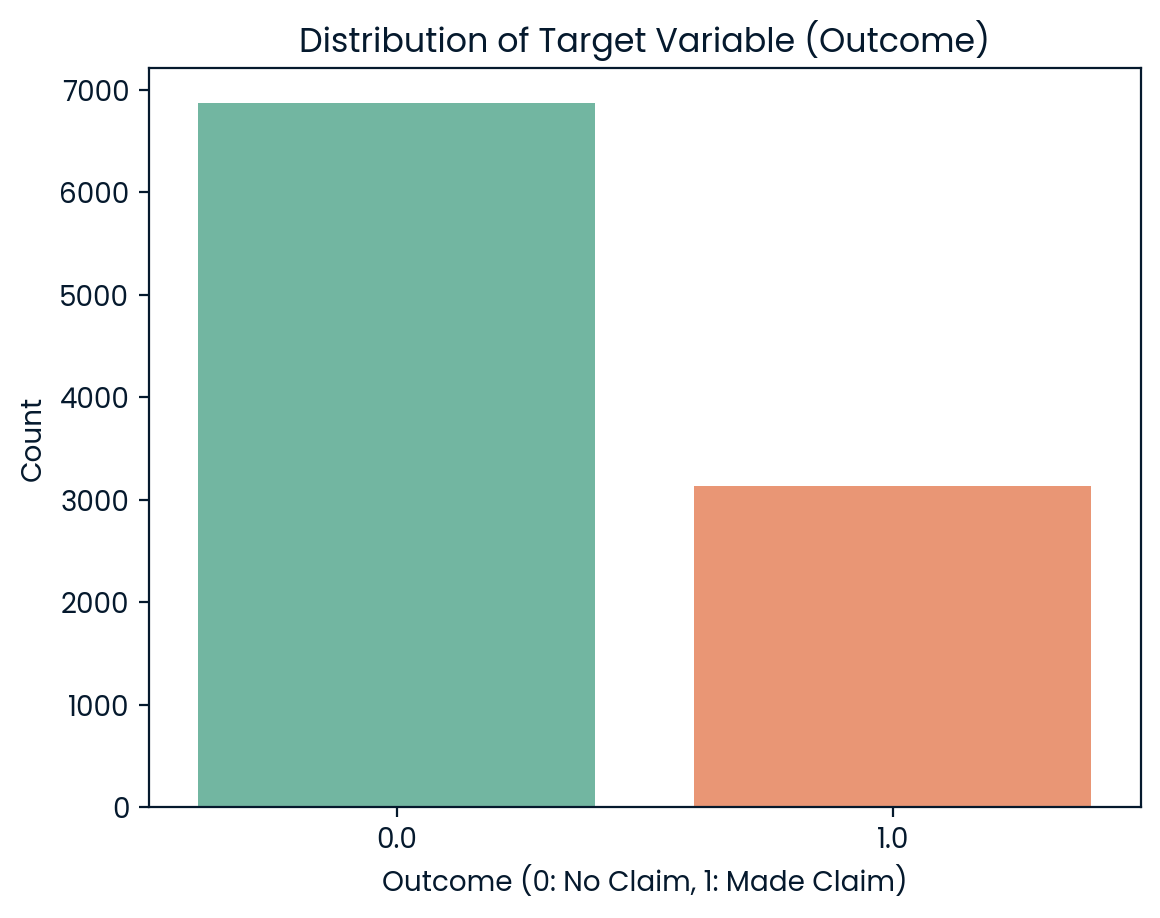

In [6]:
# Check for class balance in the target variable
print("\nTarget variable distribution:")
print(cars['outcome'].value_counts(normalize=True))
# Visualize the target variable distribution
sns.countplot(data=cars, x='outcome', palette='Set2')
plt.title("Distribution of Target Variable (Outcome)")
plt.xlabel("Outcome (0: No Claim, 1: Made Claim)")
plt.ylabel("Count")
plt.show()

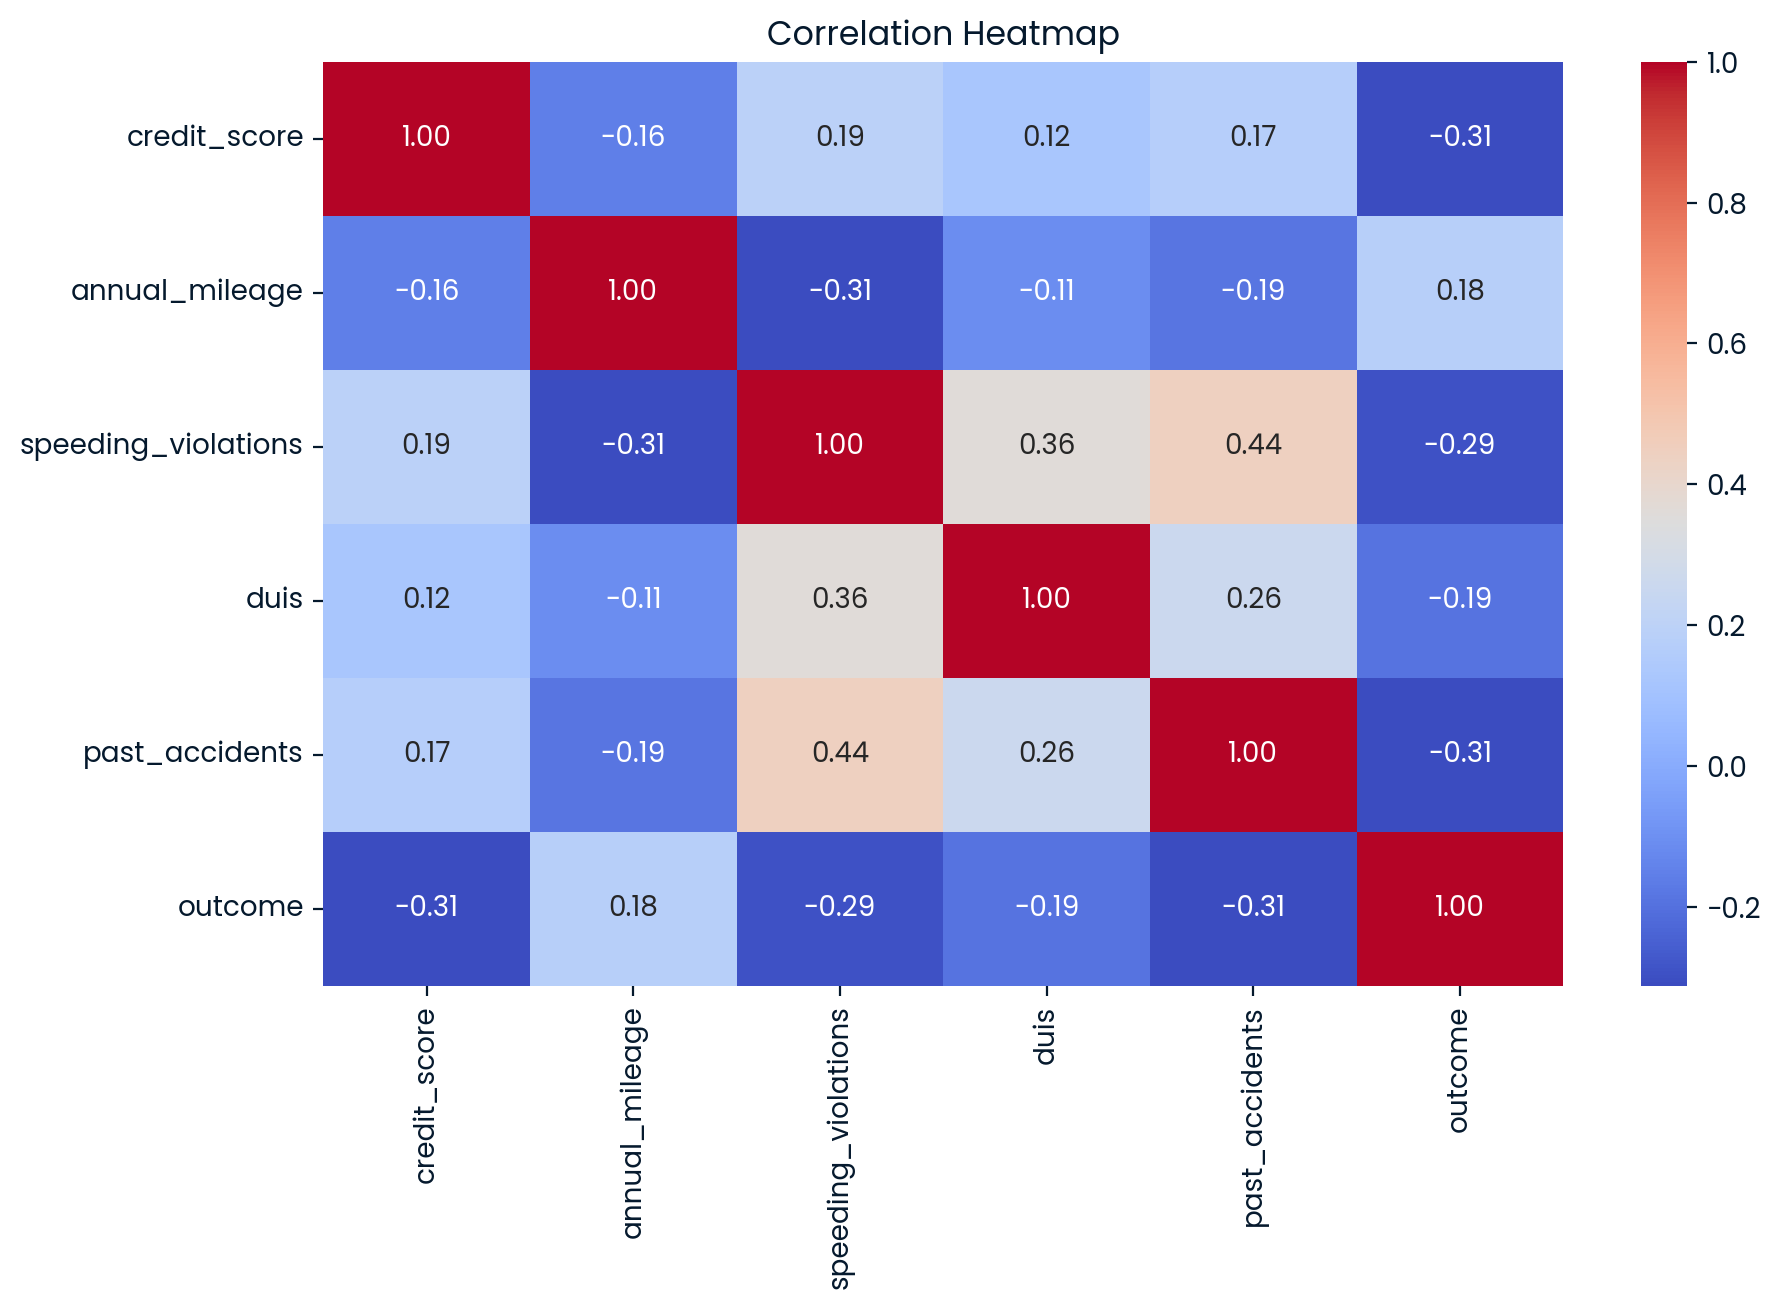

In [7]:
# Correlation heatmap for numerical features
numerical_features = ['credit_score', 'annual_mileage', 
                      'speeding_violations', 'duis', 'past_accidents']
correlation_matrix = cars[numerical_features + ['outcome']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

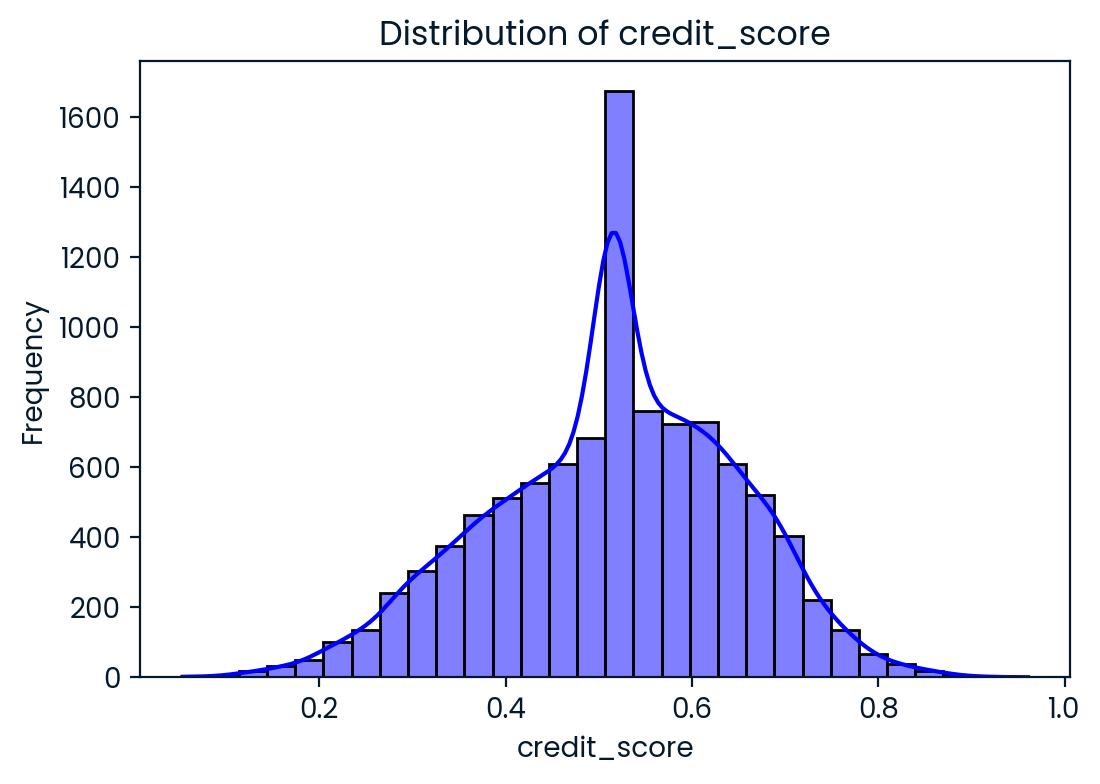

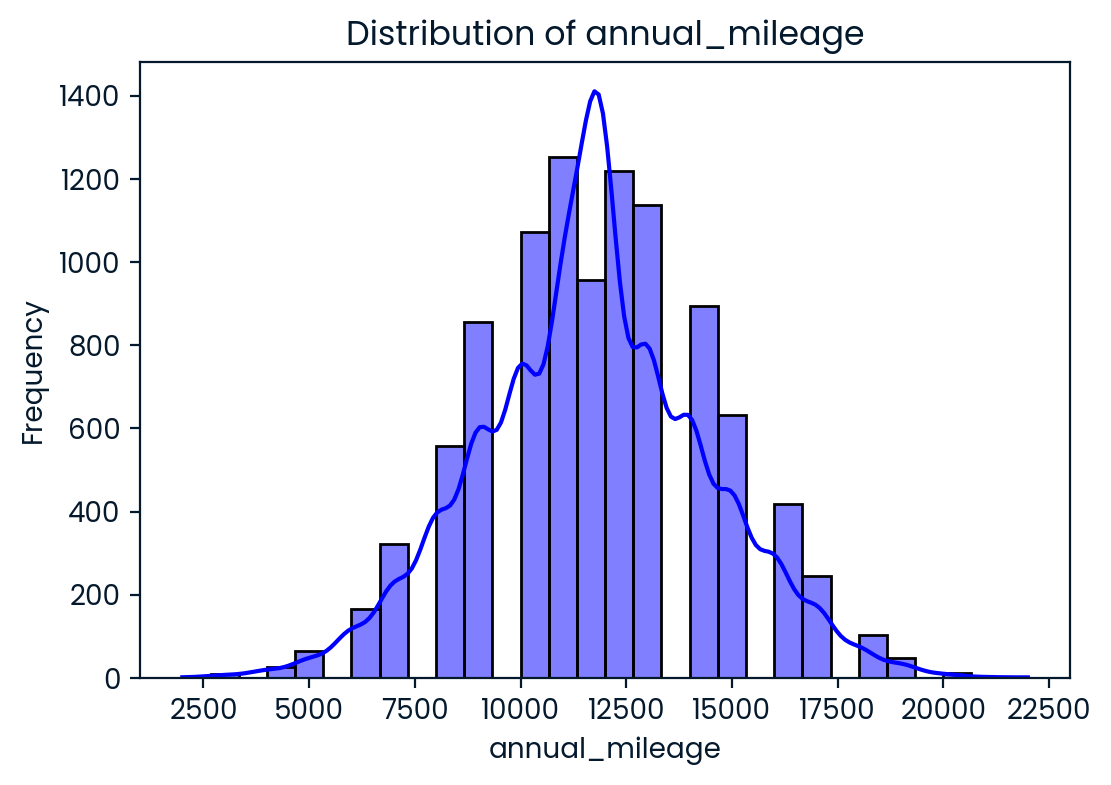

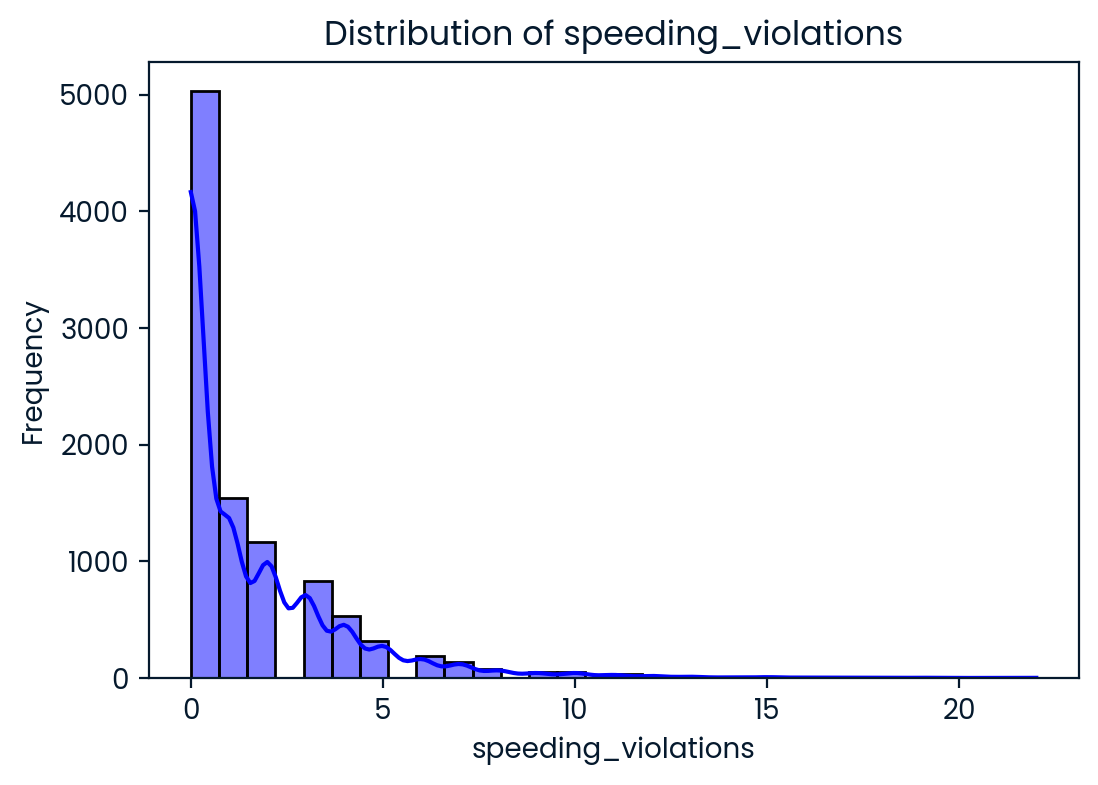

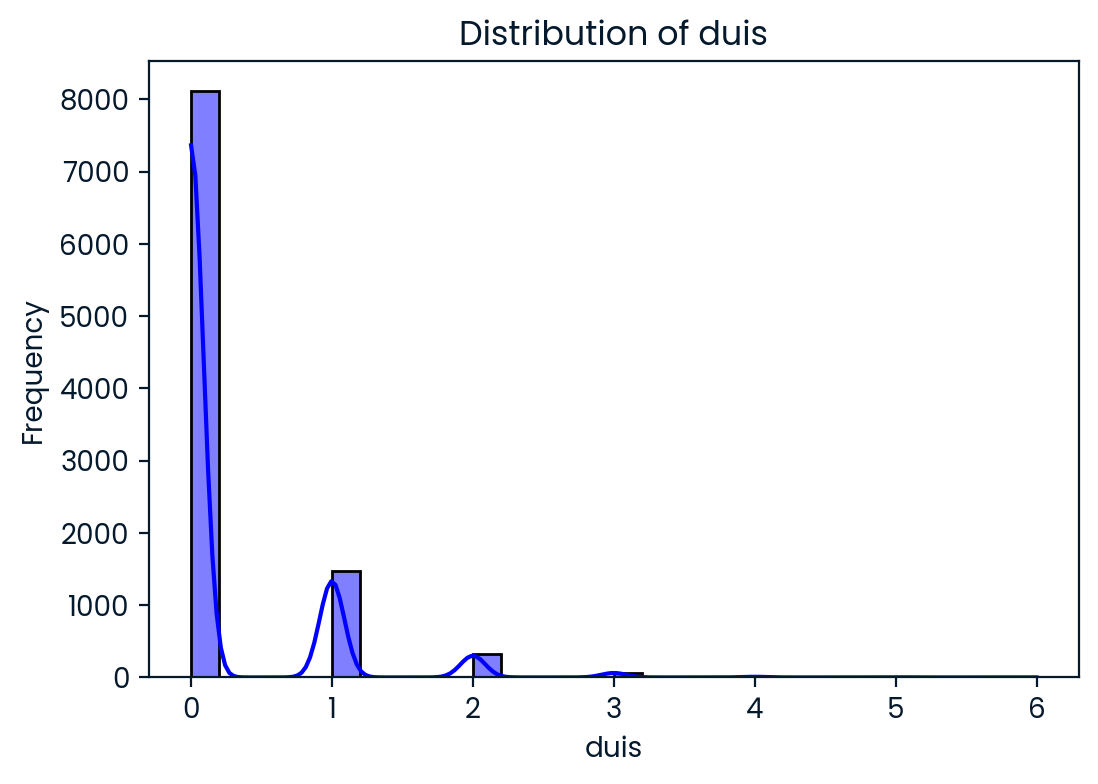

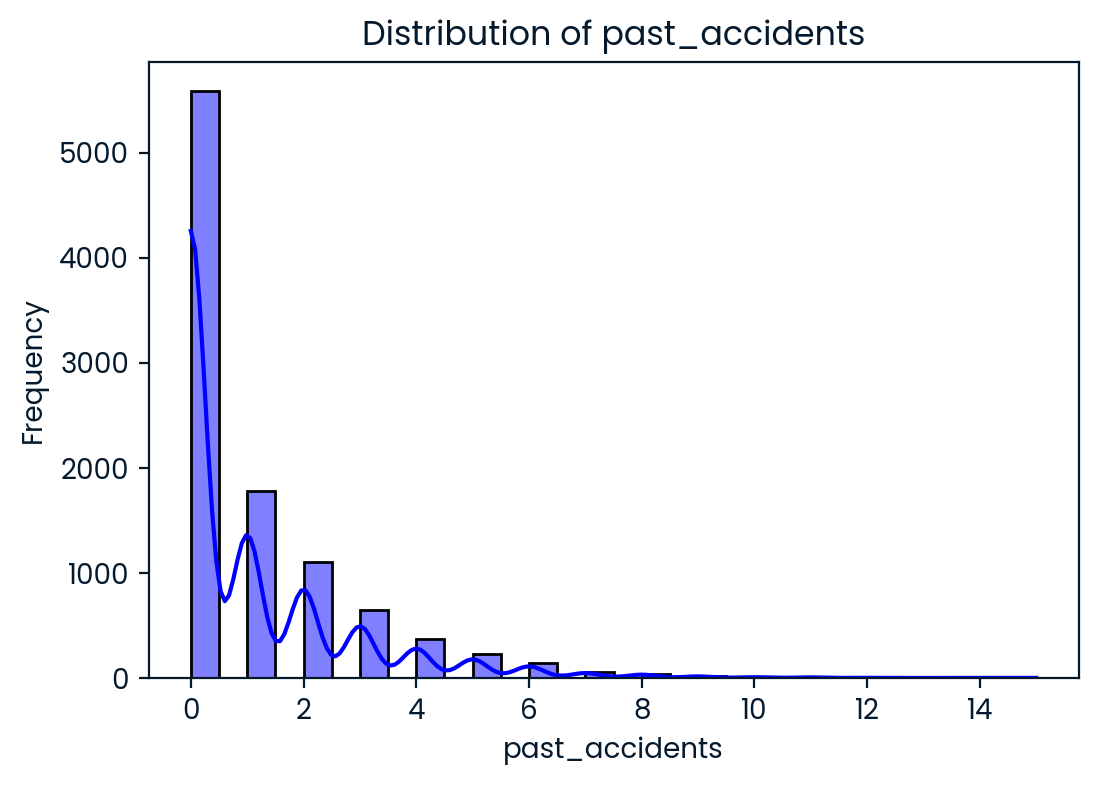

In [8]:
# Univariate analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(cars[feature], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

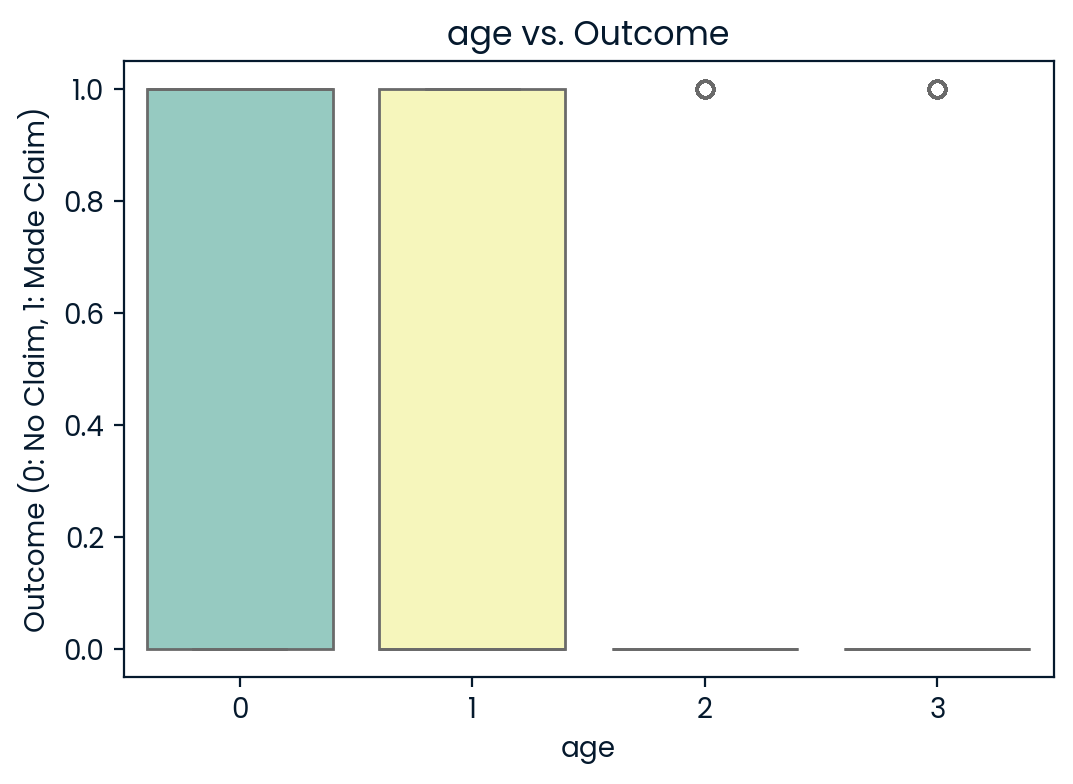

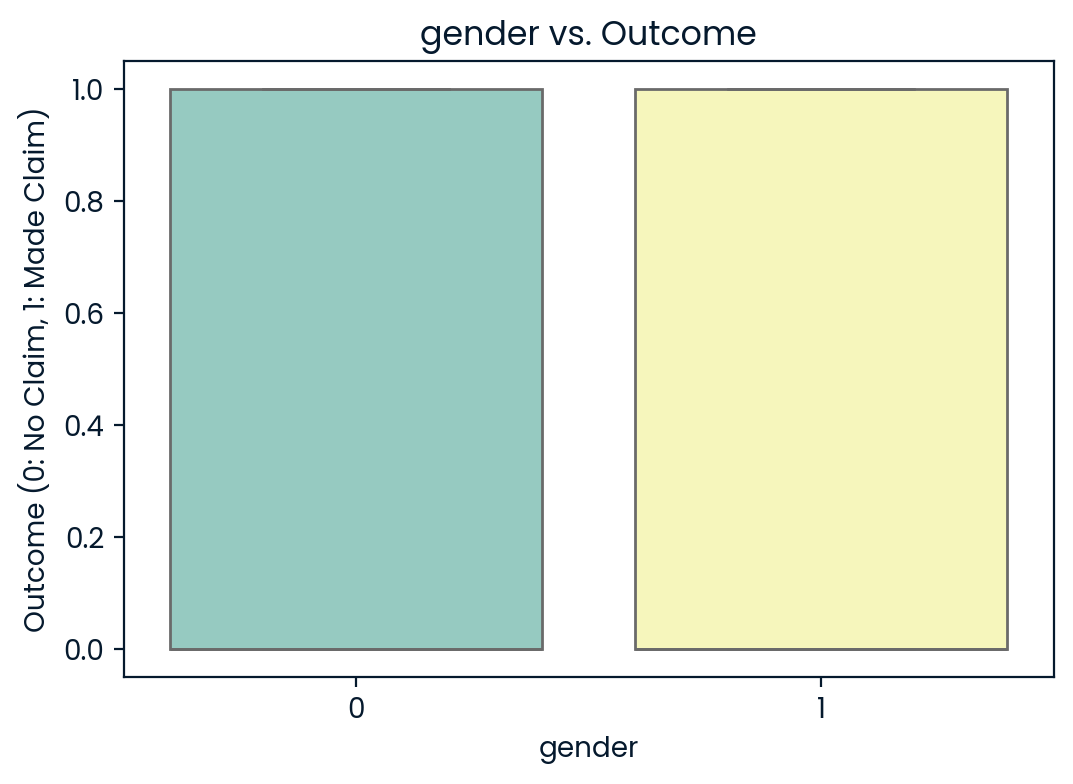

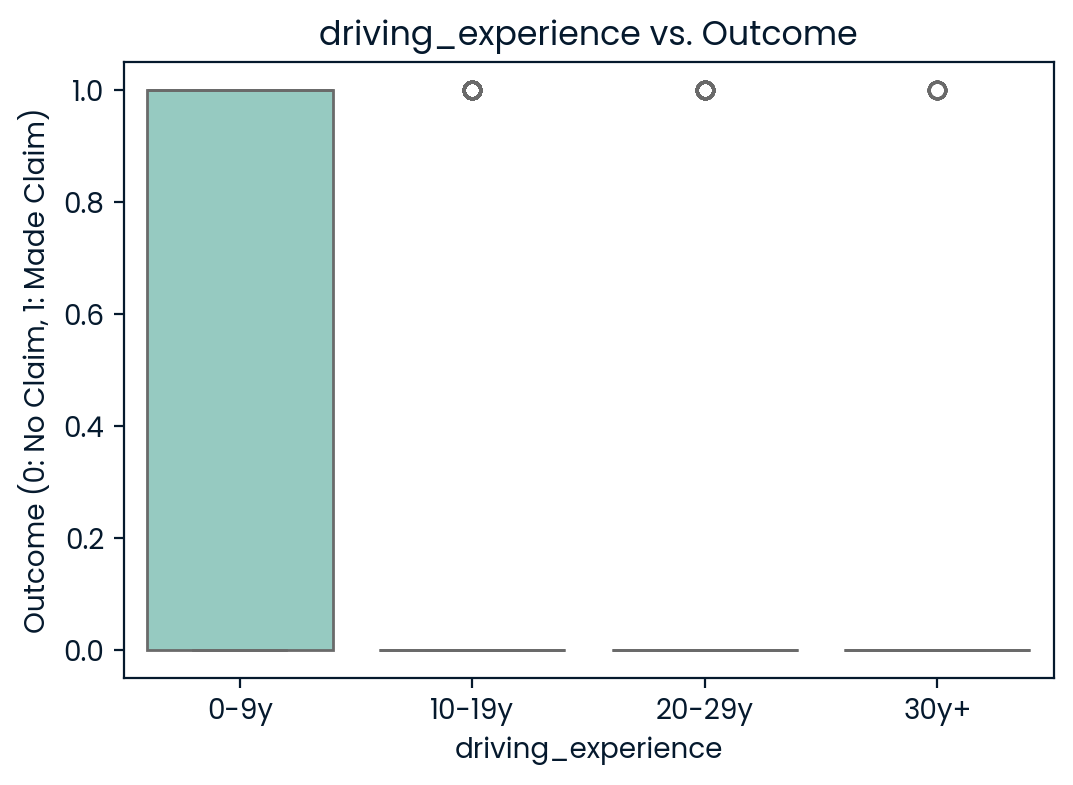

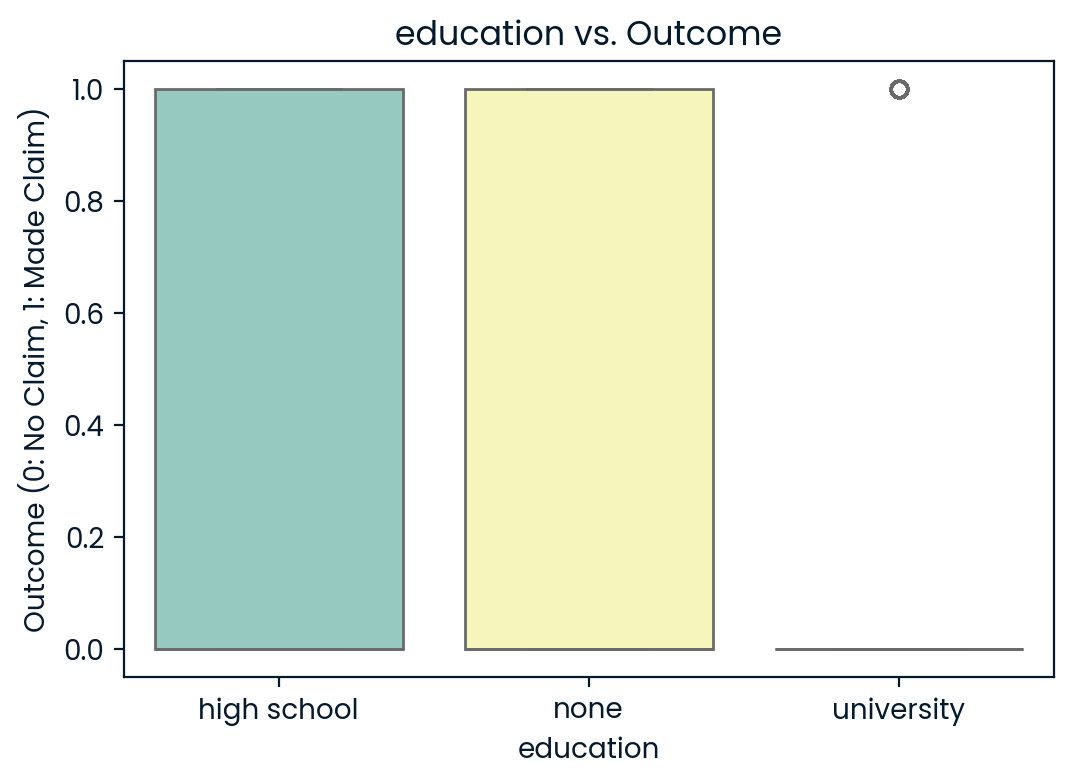

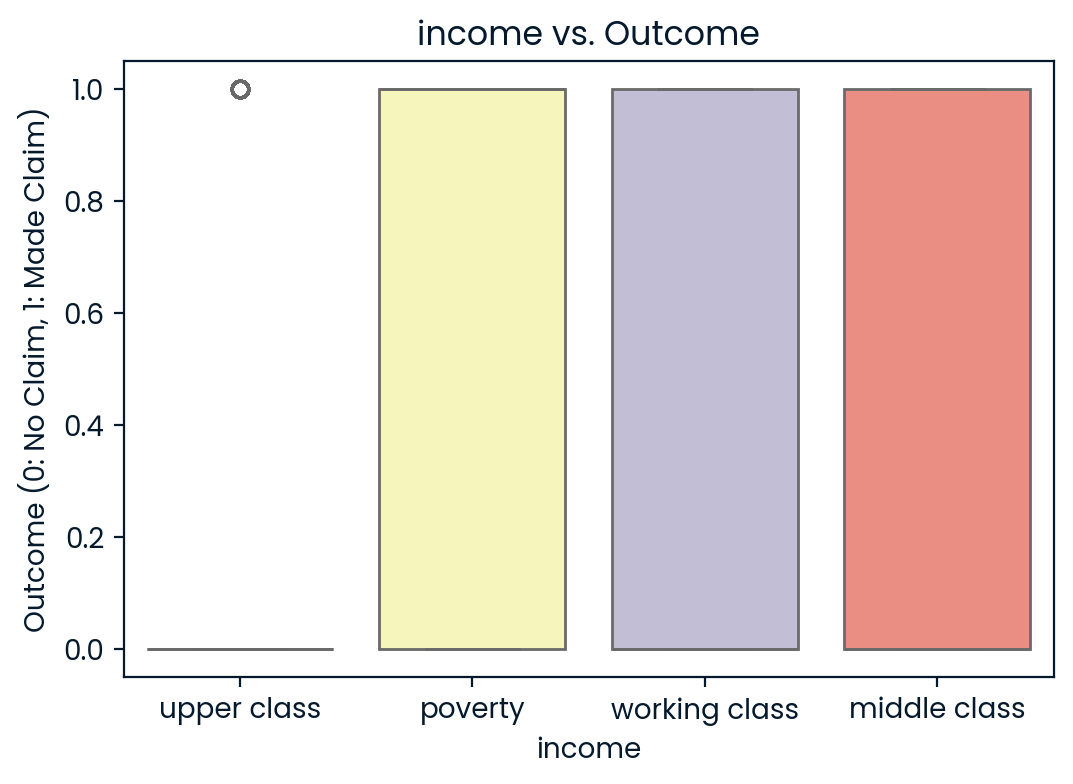

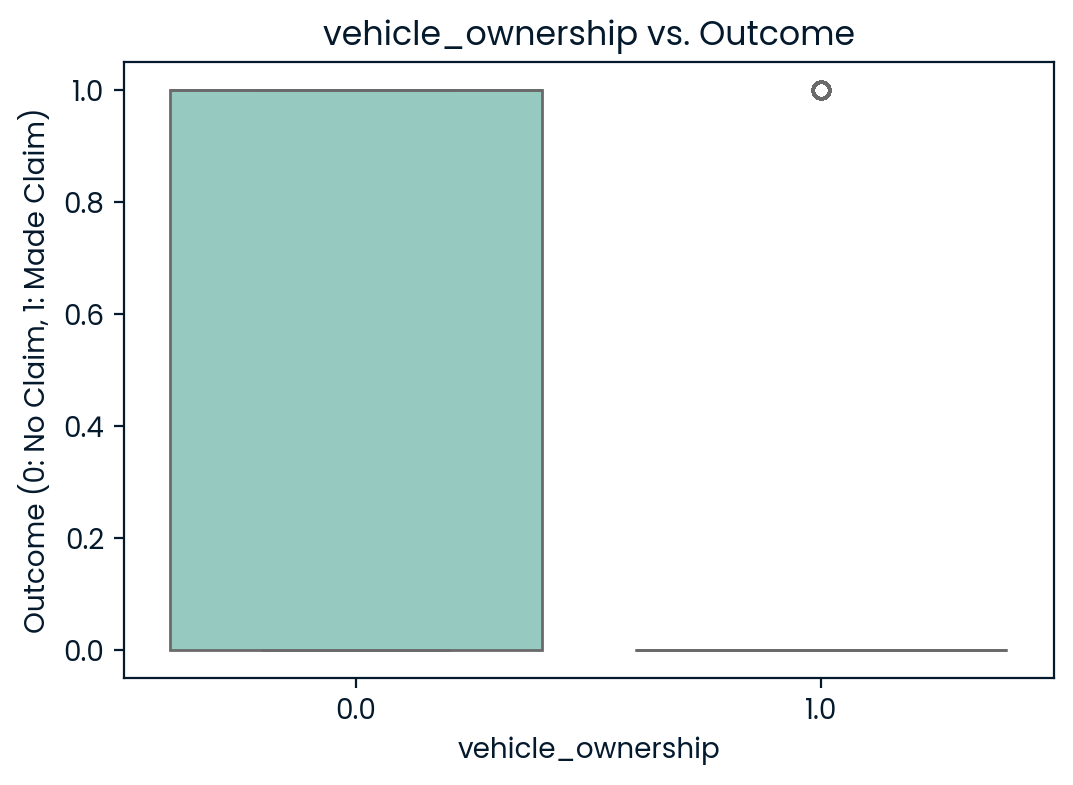

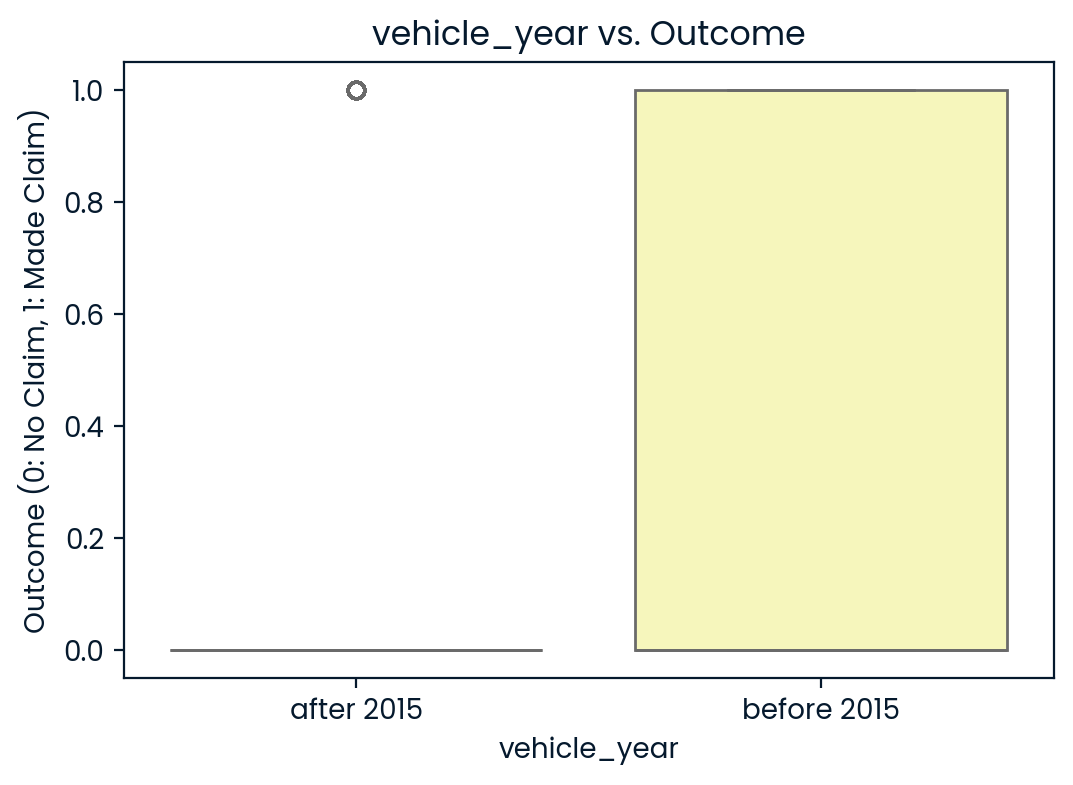

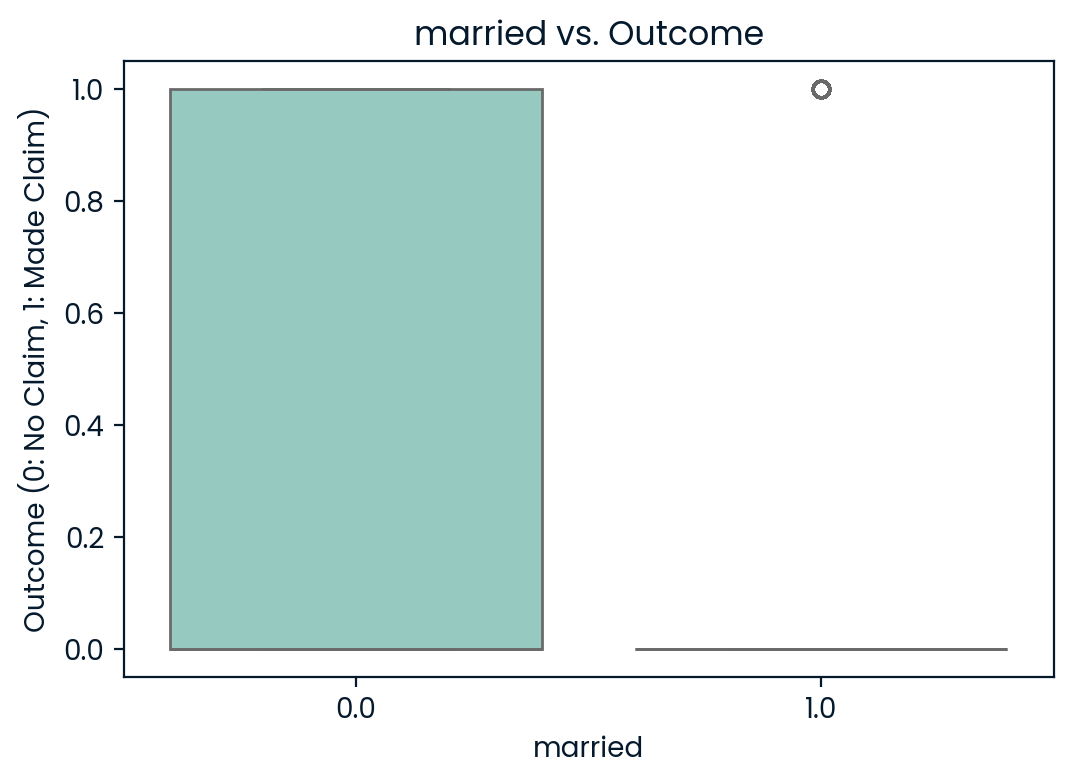

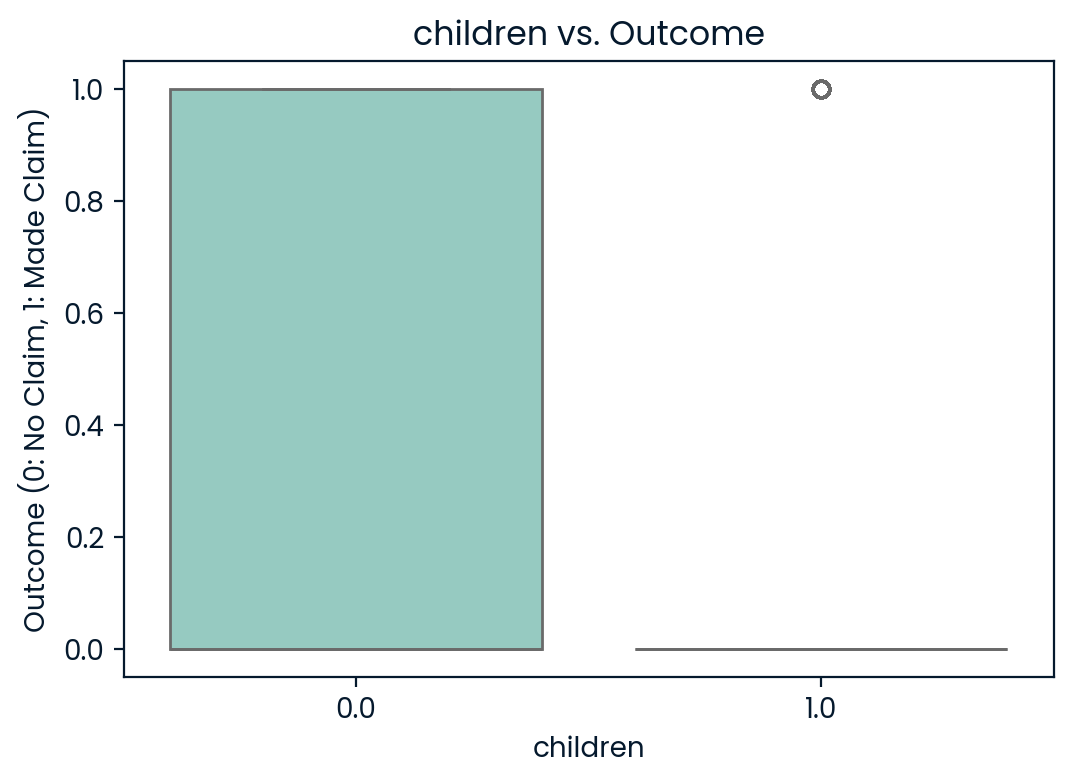

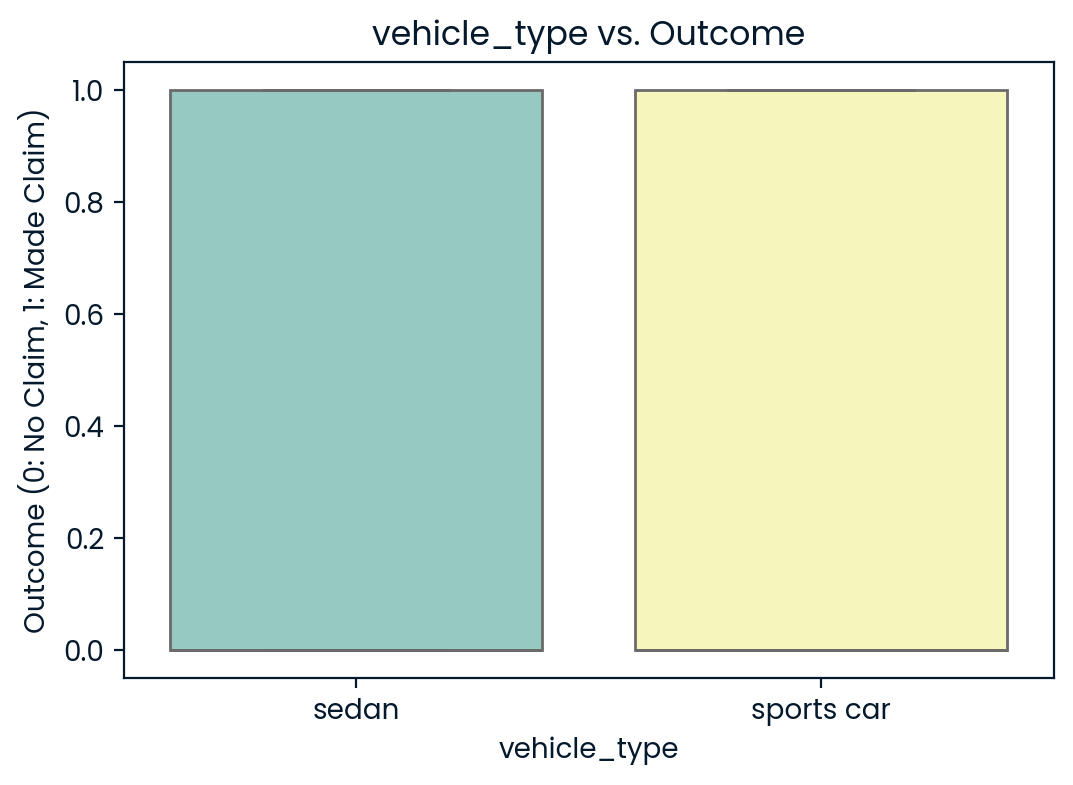

In [9]:
# Boxplots for categorical features vs. target
categorical_features = ['age', 'gender', 'driving_experience', 'education', 
                        'income', 'vehicle_ownership', 'vehicle_year', 
                        'married', 'children', 'vehicle_type']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=cars, x=feature, y='outcome', palette='Set3')
    plt.title(f"{feature} vs. Outcome")
    plt.xlabel(feature)
    plt.ylabel("Outcome (0: No Claim, 1: Made Claim)")
    plt.show()


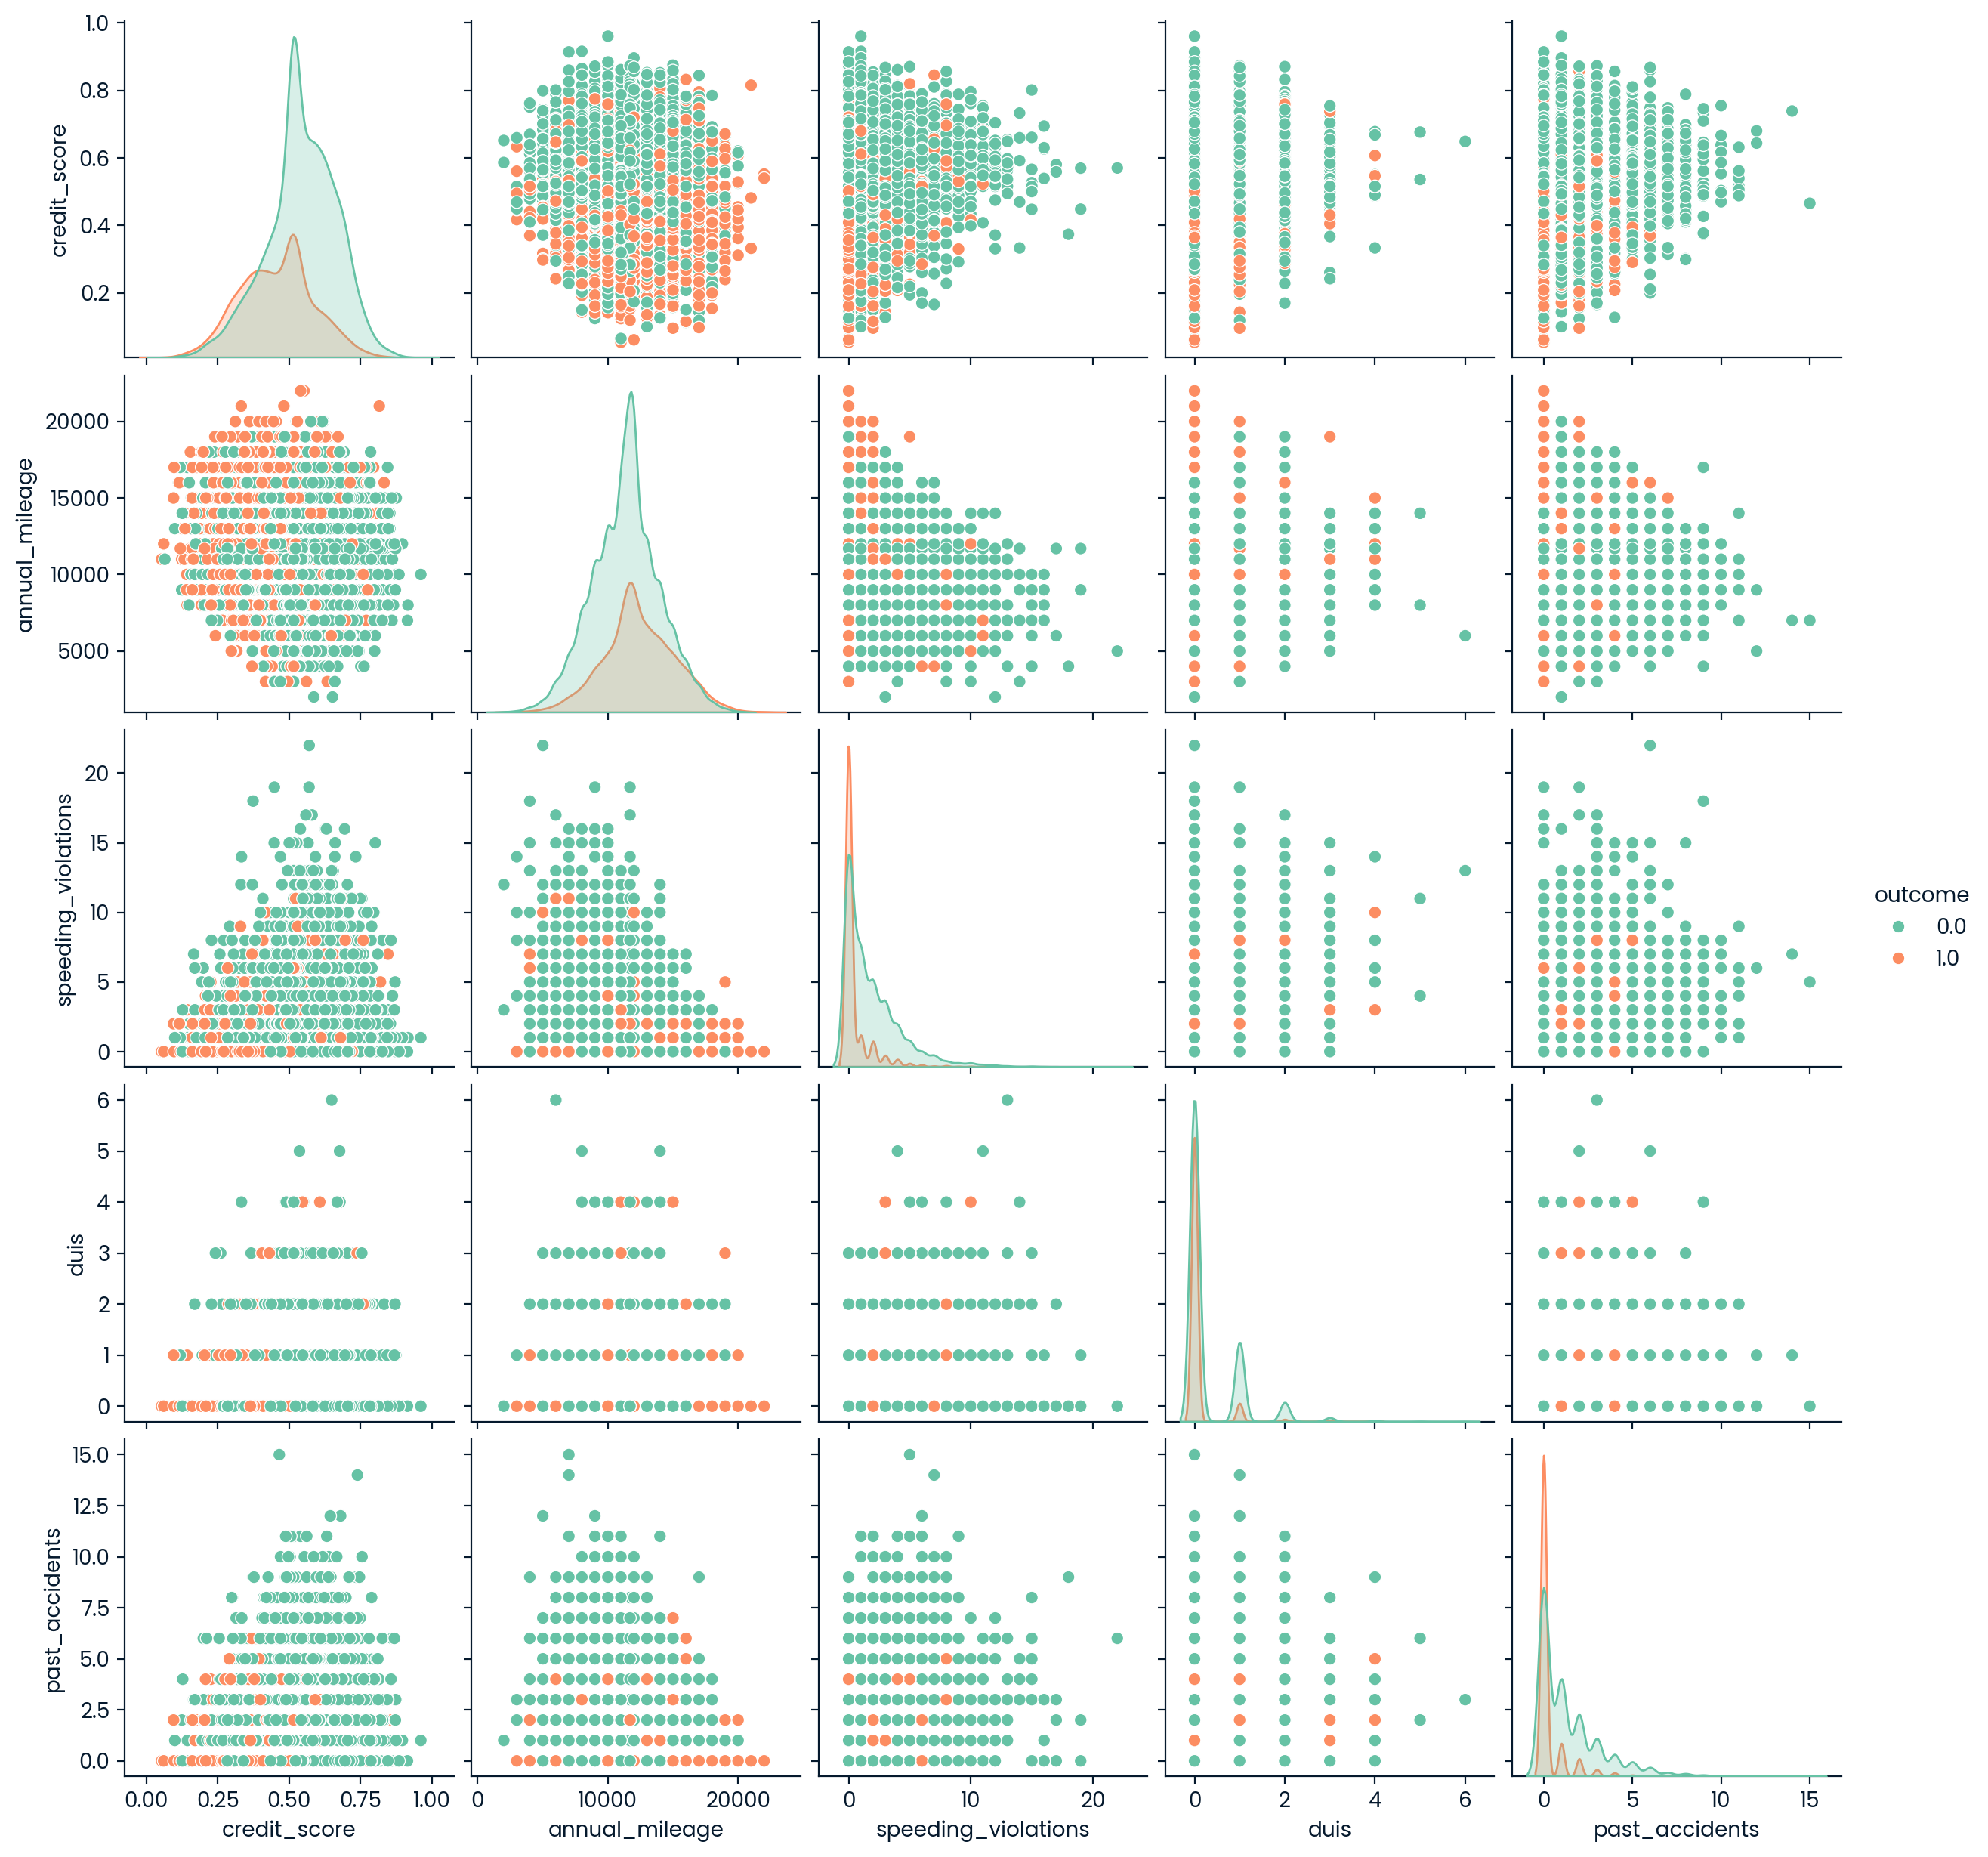


age vs Outcome:
age
0    0.718254
1    0.336925
2    0.155919
3    0.098492
Name: outcome, dtype: float64

gender vs Outcome:
gender
0    0.263673
1    0.363126
Name: outcome, dtype: float64

driving_experience vs Outcome:
driving_experience
0-9y      0.628045
10-19y    0.238557
20-29y    0.051439
30y+      0.019011
Name: outcome, dtype: float64

education vs Outcome:
education
high school    0.32331
none           0.47154
university     0.22556
Name: outcome, dtype: float64

income vs Outcome:
income
middle class     0.276894
poverty          0.653804
upper class      0.133533
working class    0.453271
Name: outcome, dtype: float64

vehicle_ownership vs Outcome:
vehicle_ownership
0.0    0.579868
1.0    0.197418
Name: outcome, dtype: float64

vehicle_year vs Outcome:
vehicle_year
after 2015     0.106495
before 2015    0.403330
Name: outcome, dtype: float64

married vs Outcome:
married
0.0    0.434436
1.0    0.191289
Name: outcome, dtype: float64

children vs Outcome:
children
0.0    0

In [10]:
# Pairplot for numerical features
sns.pairplot(cars[numerical_features + ['outcome']], hue='outcome', palette='Set2')
plt.show()

# Grouped means of features by outcome
for feature in categorical_features:
    print(f"\n{feature} vs Outcome:")
    print(cars.groupby(feature)['outcome'].mean())

**Age vs Outcome**
Younger drivers (16-25 years) have the highest claim rate (71.8%).
Claim rates decrease significantly with age, with the lowest rate for those aged 65+ (9.8%).
--> Age is a strong predictor; younger drivers are significantly more likely to make claims.

**Gender vs Outcome**
Males have a higher claim rate (36.3%) compared to females (26.3%).
--> Gender shows moderate predictive power, with males being more prone to claims.

**Driving Experience vs Outcome**
Drivers with 0-9 years of experience have the highest claim rate (62.8%).
Claim rates drop as experience increases, with the lowest rate for 30+ years (1.9%).
--> Driving experience is highly predictive; inexperienced drivers are much more likely to make claims.

**Education vs Outcome**
Clients with no education have the highest claim rate (47.2%), followed by high school (32.3%), and university (22.6%).
--> Higher education levels are associated with lower claim rates.

**Income vs Outcome**
Clients in poverty have the highest claim rate (65.4%).
Claim rates decrease with income, with the lowest rate in the upper class (13.4%).
--> Income is a strong predictor; financially struggling clients are more likely to file claims.

**Vehicle Ownership vs Outcome**
Non-owners (financing vehicles) have a much higher claim rate (57.9%) compared to owners (19.7%).
--> Vehicle ownership status is strongly associated with claim likelihood.

**Vehicle Year vs Outcome**
Vehicles registered before 2015 have a significantly higher claim rate (40.3%) than newer vehicles (10.6%).
--> Older vehicles are more likely to be involved in claims.

**Marital Status vs Outcome**
Unmarried clients have a higher claim rate (43.4%) compared to married clients (19.1%).
--> Marital status correlates with claim rates, possibly due to risk-related behaviors.

**Children vs Outcome**
Clients without children have a higher claim rate (47.4%) compared to those with children (24.1%).
--> Having children may be associated with more cautious behavior and lower claim rates.

**Vehicle Type vs Outcome**
Claim rates are similar for sedans (31.3%) and sports cars (32.5%).
--> Vehicle type shows limited impact on claim rates.




In [16]:
import pandas as pd
from statsmodels.formula.api import logit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Feature columns
features = cars.drop(columns=["id", "outcome"]).columns

# Initialize list to store results
results = []

# Loop through features
for col in features:
    # Fit logistic regression model
    model = logit(f"outcome ~ {col}", data=cars).fit(disp=False)
    
    # Predict probabilities and binary outcomes
    predictions = (model.predict(cars[col]) >= 0.5).astype(int)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(cars['outcome'], predictions)
    precision = precision_score(cars['outcome'], predictions)
    recall = recall_score(cars['outcome'], predictions)
    f1 = f1_score(cars['outcome'], predictions)
    roc_auc = roc_auc_score(cars['outcome'], model.predict(cars[col]))
    
    # Append feature and metrics to results
    results.append({
        "feature": col,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    })



In [17]:
# Convert results to a DataFrame for easier processing
results_df = pd.DataFrame(results)

# Identify the best feature based on the highest ROC-AUC (or any other metric of choice)
best_feature_df = results_df.loc[results_df['roc_auc'].idxmax()]

# Print the best feature and its evaluation metrics
print("Best Feature and Evaluation Metrics:")
print(best_feature_df)

Best Feature and Evaluation Metrics:
feature      driving_experience
accuracy                 0.7771
precision              0.628045
recall                 0.707628
f1_score               0.665466
roc_auc                   0.808
Name: 2, dtype: object


The results indicate that "driving_experience" is the best feature for predicting whether a customer will make a claim, based on the evaluation metrics. Here's a breakdown of the metrics:


Evaluation of "driving_experience":

Accuracy: 77.71% — The model correctly predicts the outcome for around 77.71% of the samples.

Precision: 62.80% — Out of all the customers predicted to make a claim, 62.80% actually did.

Recall: 70.76% — Of all the customers who made a claim, 70.76% were correctly identified by the model.

F1-Score: 66.55% — The harmonic mean of precision and recall, balancing both metrics.

ROC-AUC: 80.8% — The model has a good ability to distinguish between the classes (claim/no claim), with a higher score indicating better performance.

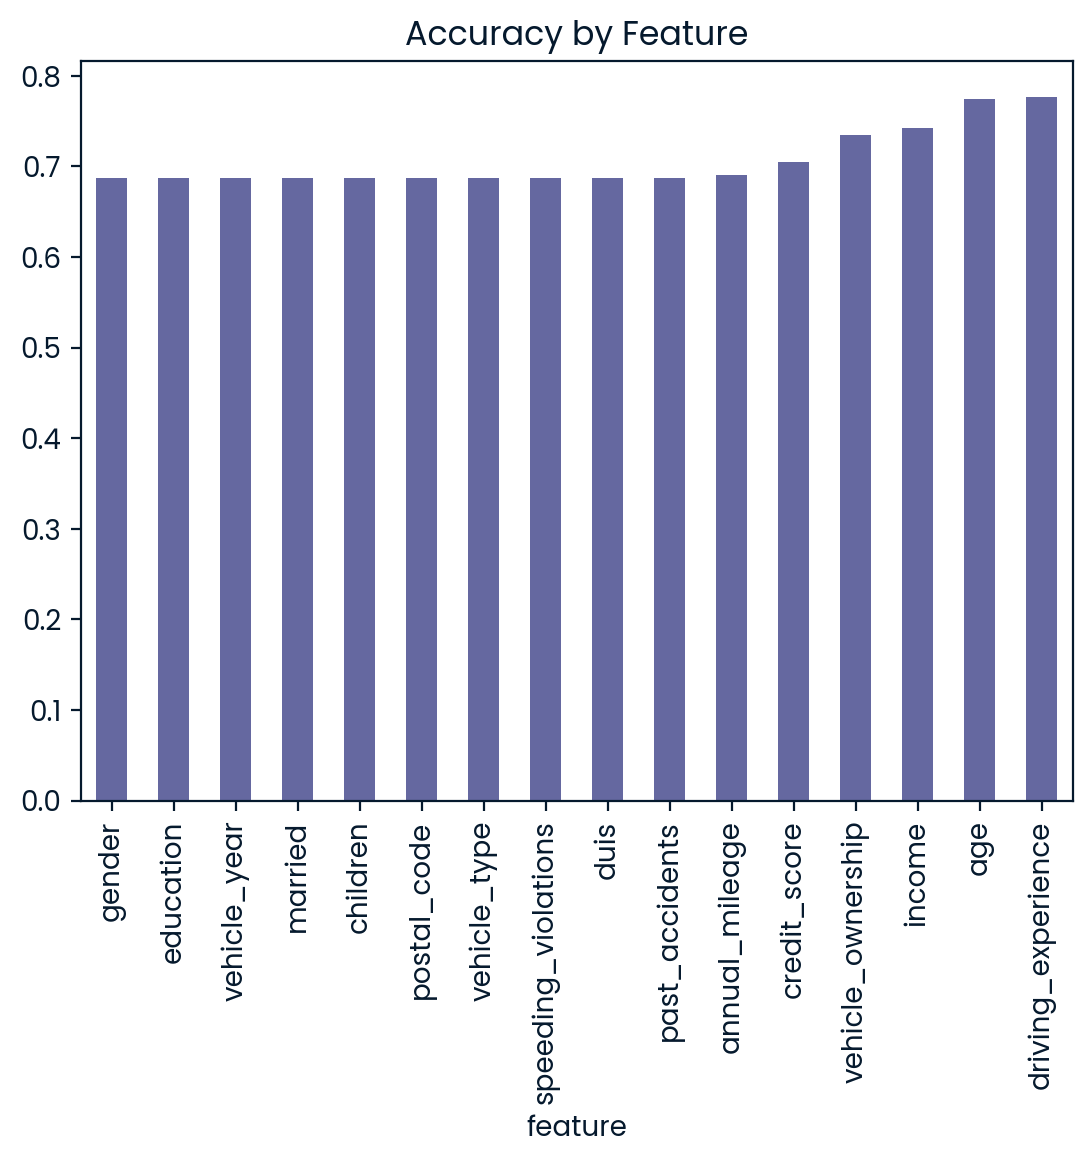

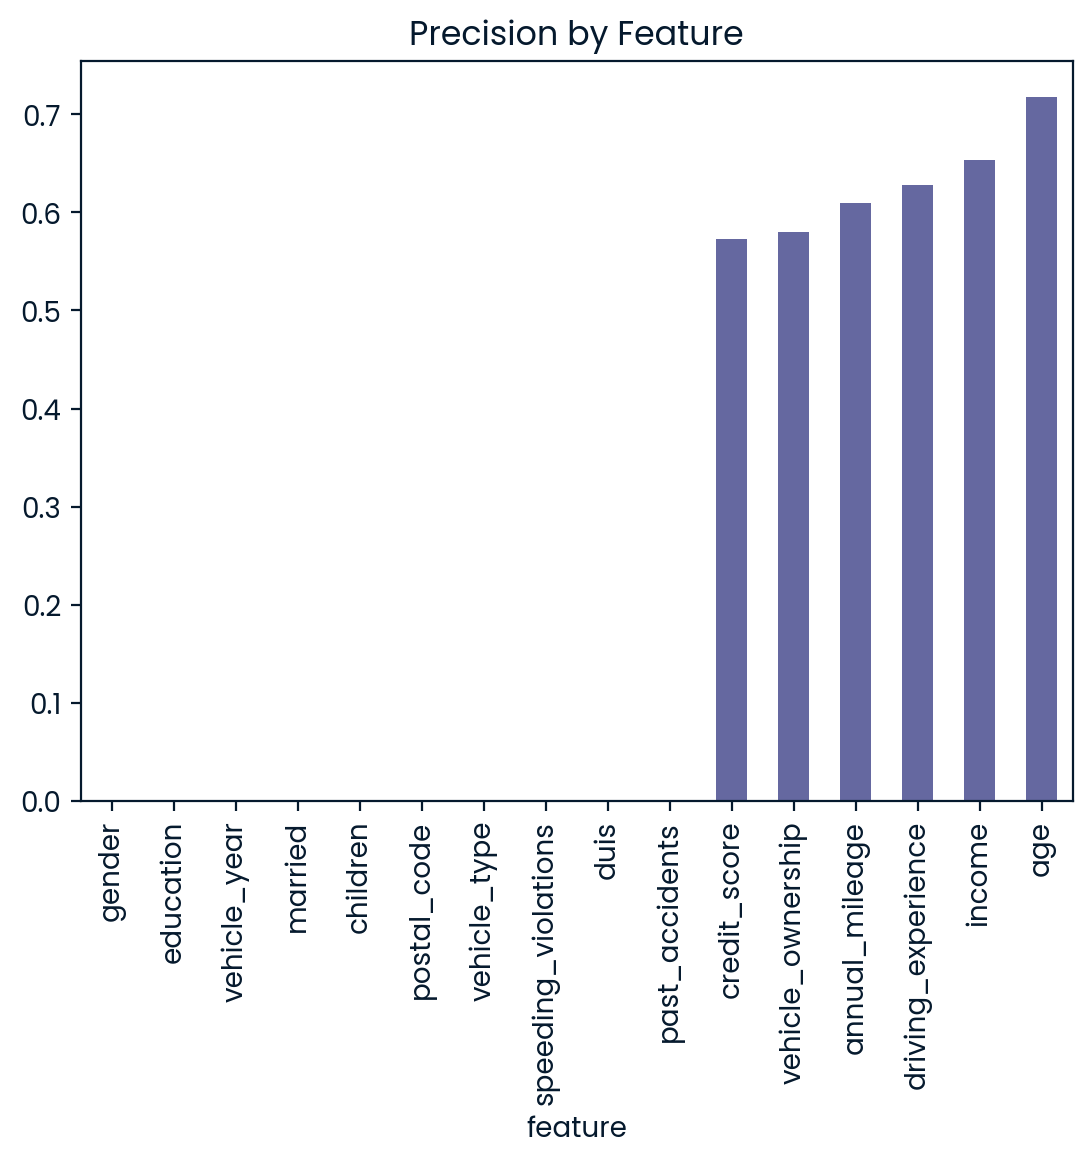

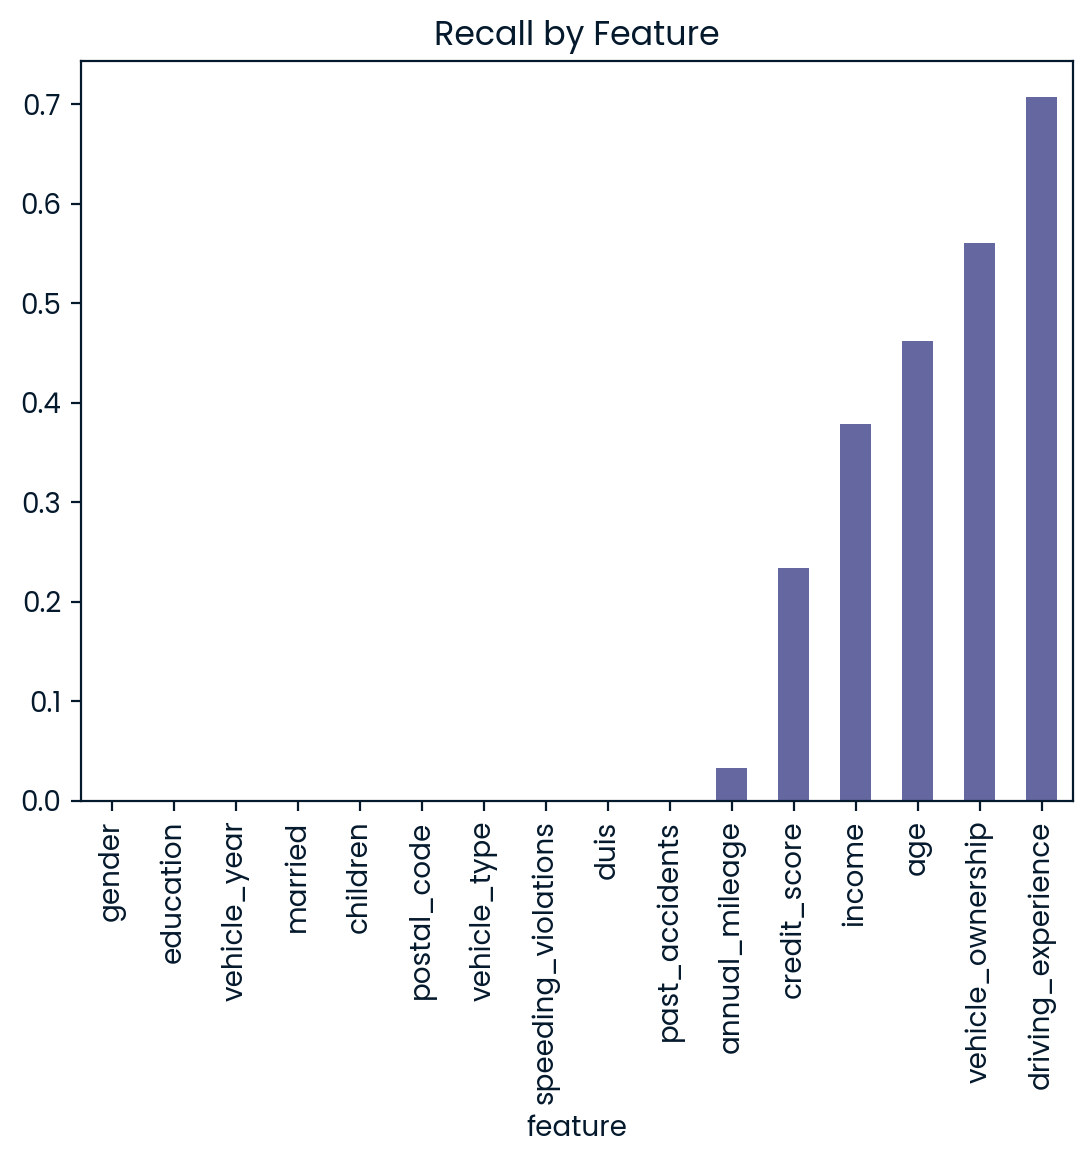

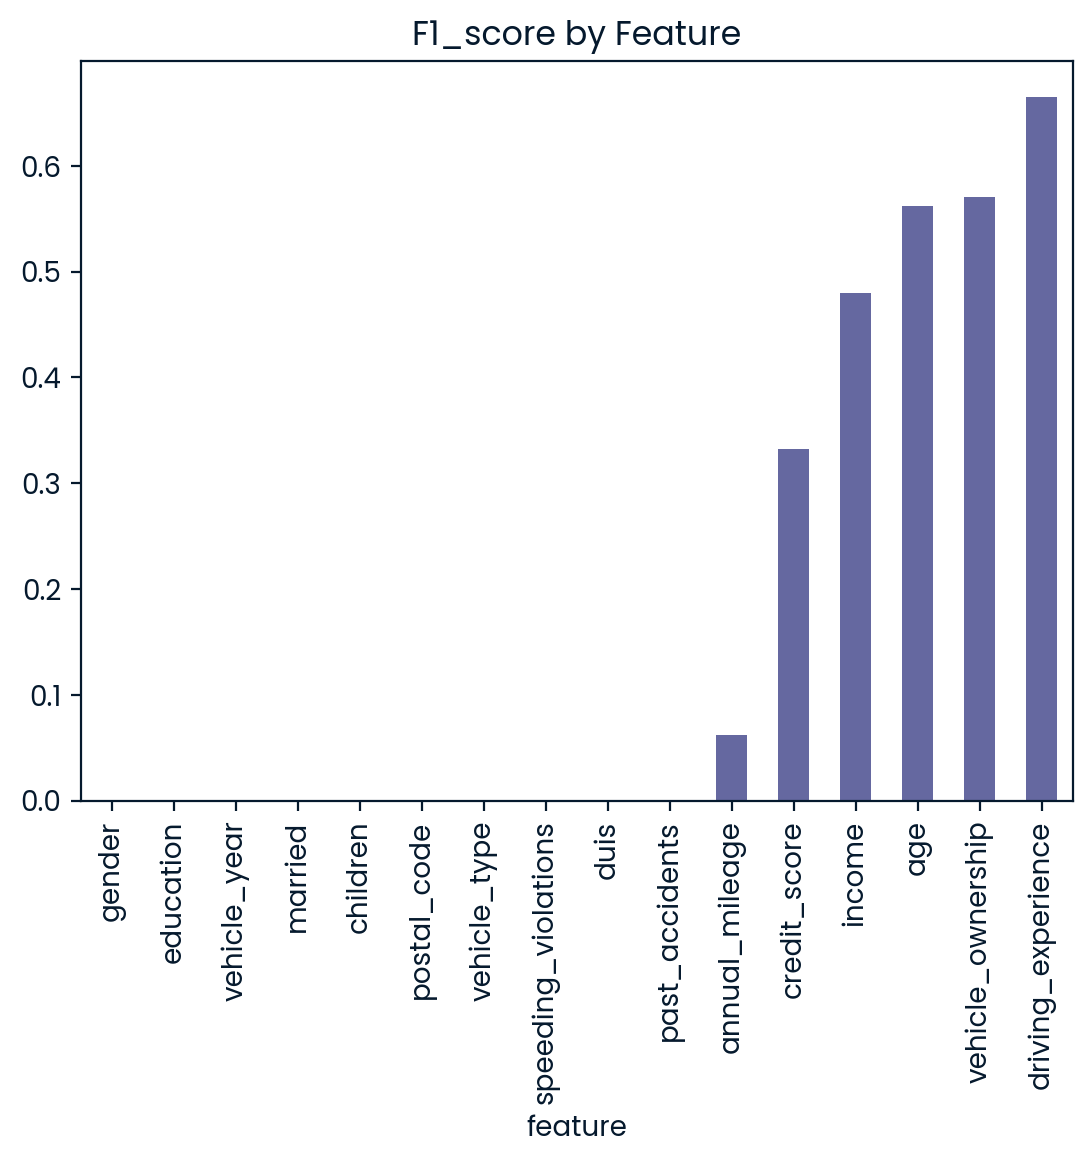

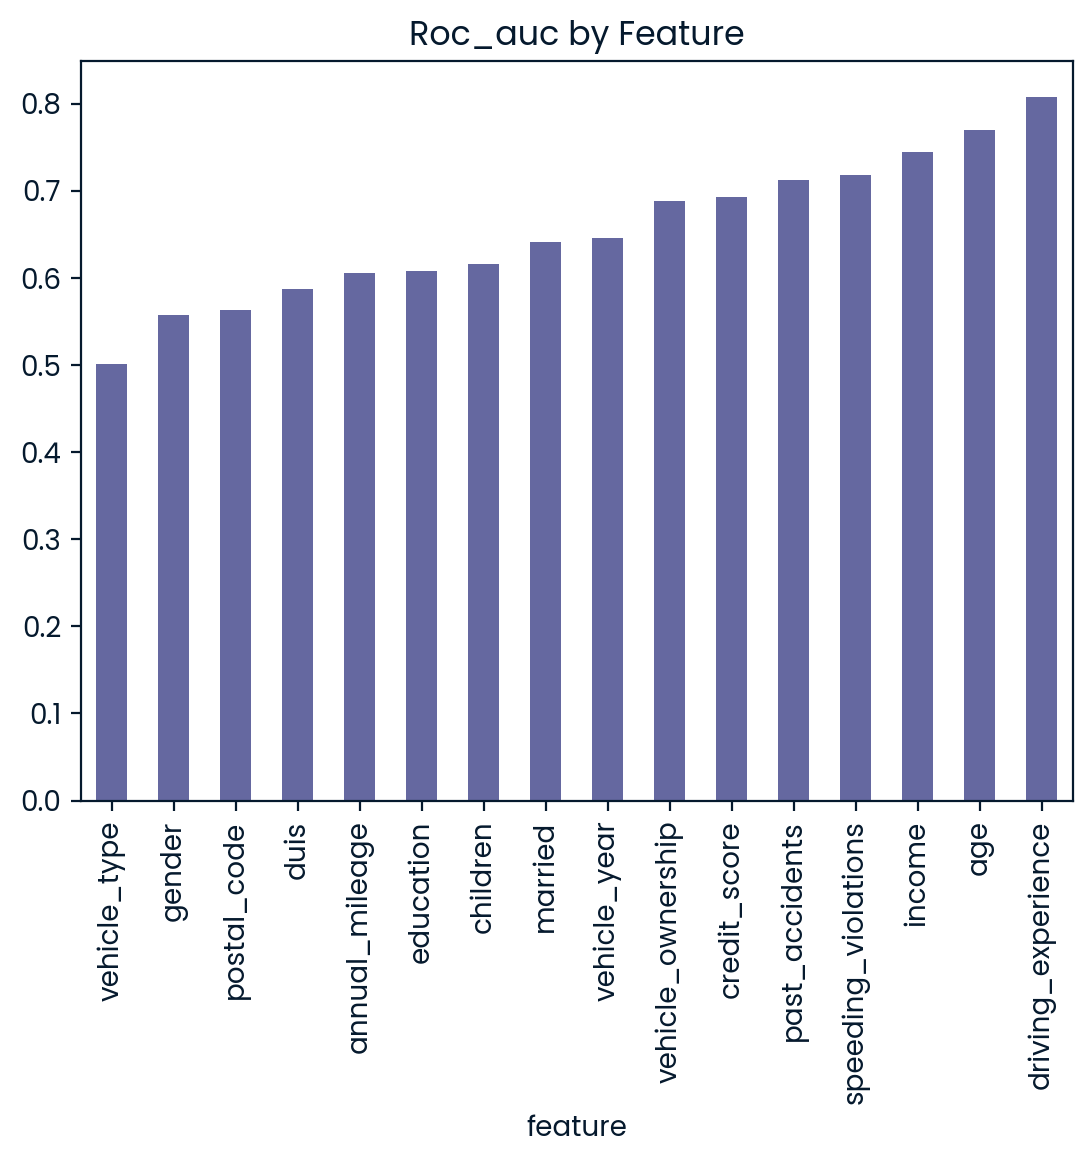

In [15]:
import matplotlib.pyplot as plt
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
for metric in metrics:
    results_df.sort_values(by=metric).plot(x='feature', y=metric, kind='bar', legend=False, title=f'{metric.capitalize()} by Feature')
    plt.show()
